In [1]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# features inputs and removing time column(outlier detection) 
inp=df.drop(['time','DEATH_EVENT'],axis=1)
inp.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0


In [4]:
#classification
#labels output (1 0r 0)

op=df['DEATH_EVENT']
op.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [5]:
#splitting data for testing and training


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inp,op,test_size=0.3,random_state=10)

In [7]:
#applying differnt algorithms for model selection

# 1=> Logistic reg

In [8]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [9]:
model1.score(x_test,y_test)

0.7444444444444445

In [10]:
y_predicted1=model1.predict(x_test)

In [11]:
#_predicted1


In [12]:
y_test.head()

24     1
64     0
102    0
170    0
285    0
Name: DEATH_EVENT, dtype: int64

In [13]:
 model1.predict([[75,0,582,0,20,1,265000,1.9,130,1,0]]) 
#expeded 1


array([1], dtype=int64)

# 2=> decision tree classifier


In [14]:

from sklearn import tree
model2=tree.DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
y_predicted2=model2.predict(x_test)
#y_predicted2

In [16]:
y_test

24     1
64     0
102    0
170    0
285    0
      ..
49     1
273    0
194    1
58     1
148    1
Name: DEATH_EVENT, Length: 90, dtype: int64

In [17]:
model2.score(x_test,y_test)

0.6222222222222222

# 3=> support vector machine

In [18]:
from sklearn.svm import SVC
model3=SVC()
model3.fit(x_train,y_train)

SVC()

In [19]:
y_predicted3=model3.predict(x_test)
model3.score(x_test,y_test)

0.6777777777777778

# 4=> Random forest classifier

In [20]:


from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier(n_estimators=10)
model4.fit(x_train,y_train)
y_predicted4=model4.predict(x_test)

In [21]:
model4.score(x_test,y_test)

0.7222222222222222

#  creating  confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sn
def confu_mat(y_pred_no):
    cm=confusion_matrix(y_test,y_pred_no)
    
    plt.figure(figsize=(12,8))
    sn.heatmap(cm,annot=True)

#     on x = actual ony =predicted
    



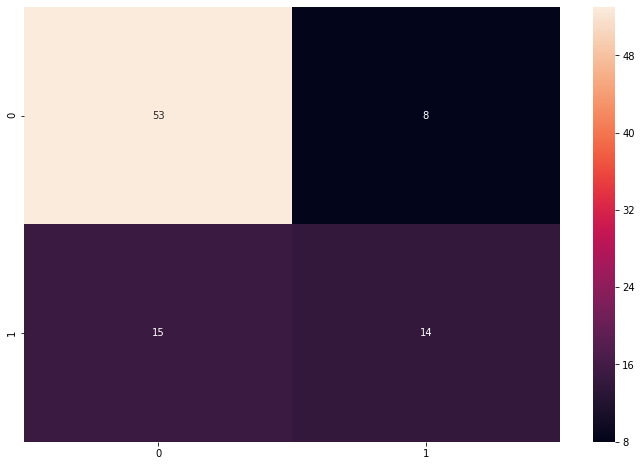

In [23]:
confu_mat(y_predicted1)

In [24]:
#confu_mat(y_predicted2)

In [25]:
#confu_mat(y_predicted3)

In [26]:
#confu_mat(y_predicted4)

In [27]:
# u can do  is createonly one function and give it diff arg to crate diff models


In [29]:
#we tested our data for 4 algo with avg accuracy 
#1.logistic regresion (70% )
#2.DecisionTree(60%)
#3.SVM(60%)
#4.RAndom_forest (70%)




# i here select modelof logistic regression for application

In [31]:
import pickle
pickle.dump(model1,open('final_model.pkl','wb'))

In [33]:
m1=pickle.load(open('final_model.pkl','rb'))

In [34]:
m1.predict([[75,0,582,0,20,1,265000,1.9,130,1,0]])

array([1], dtype=int64)

In [ ]:
#its working fine